## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import sys
from pathlib import Path

_ = Path().resolve().parent.parent # Add [...]\MS960_MachineLearning\Projeto2 to PYTHONPATH
sys.path.insert(0, str(_))

from Projeto2.neural_network.neural import *
from Projeto2.neural_network.plots import *
from Projeto2.run import cfg

In [2]:
data_folder = "../data/test"

df_images = pd.read_csv(f"{data_folder}/images.csv", index_col=0)
df_labels = pd.read_csv(f"{data_folder}/labels.csv", index_col=0)

ratio    = pd.read_csv(f"{data_folder}/test_results/ratio.csv", index_col=0)
cost     = pd.read_csv(f"{data_folder}/test_results/cost.csv", index_col=0)
corrects = pd.read_csv(f"{data_folder}/test_results/corrects.csv", index_col=0)

In [3]:
ratio

,correto
1,86.4
0,13.6


In [4]:
corrects

,correto,original,atribuido
image_1,1,10,10
image_3,1,10,10
image_4,1,10,10
image_5,1,10,10
image_6,1,10,10
...,...,...,...
image_4996,1,9,9
image_4997,1,9,9
image_4998,0,9,1
image_4999,1,9,9


<AxesSubplot:xlabel='atribuido', ylabel='Count'>

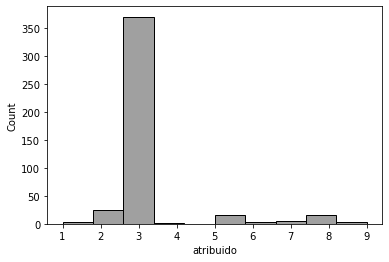

In [5]:
sns.histplot( corrects.query("original == 3")['atribuido'] , color='gray')

In [6]:
conf_matrix = pd.DataFrame( confusion_matrix( corrects['original'], corrects['atribuido'] ) )
conf_matrix.columns = cfg.LABELS
conf_matrix.index   = conf_matrix.columns
conf_matrix.insert(0, 'true/pred', 10*['-'])
conf_matrix

,true/pred,1,2,3,4,5,6,7,8,9,10
1,-,433,1,1,0,1,1,3,9,1,0
2,-,13,379,6,4,4,6,16,11,3,7
3,-,4,24,370,2,16,3,5,15,4,0
4,-,5,9,2,382,0,10,2,4,41,3
5,-,1,4,34,4,352,3,1,45,8,7
6,-,5,5,0,4,6,414,4,9,0,2
7,-,17,15,2,2,1,0,389,0,30,1
8,-,15,11,13,3,18,5,2,348,20,11
9,-,5,3,5,12,3,1,15,1,399,6
10,-,0,0,4,0,2,6,3,1,1,422


In [7]:
corrects.query("correto == 1").value_counts().sort_index()

correto  original  atribuido
1        1         1            433
         2         2            379
         3         3            370
         4         4            382
         5         5            352
         6         6            414
         7         7            389
         8         8            348
         9         9            399
         10        10           422
dtype: int64

In [8]:
gen_image(df_images['image_1005'], df_labels)

AttributeError: 'Series' object has no attribute 'columns'